<a href="https://colab.research.google.com/github/Tech-Oracle2025/Portafoli-Risk2.0/blob/main/Portafolio_Risk_VENEGAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAURA SOFÍA VENEGAS HERNÁNDEZ**

In [ ]:
from requests import get
from json import loads
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot,stackplot,subplots,hist,title
from scipy.stats import norm
import warnings

In [ ]:
api_key='afa95224e81301db93888005b35244f3' #unico para cada cuenta.
url_base='https://fmpcloud.io/api/v3/historical-price-full/{0:s}?from={1:s}&to={2:s}&apikey={3:s}'

# Consulta y descarga el diccionario de datos
def GetStock(start='2010-01-01',end='2021-08-11',ticket='AMZN'):
    url_full=url_base.format(ticket,start,end,api_key)
    #print(url_full)
    response=get(url_full)
    return loads(response.content.decode('utf-8'))

#extrae una serie de los datos de una consulta
def GetPrices(raw):
    output=pd.DataFrame(raw['historical']).set_index('date').adjClose.rename(raw['symbol'])
    return output

def GetMarket(tickets,start='2010-01-20',end='2021-08-11'):
    markets=pd.DataFrame(columns=tickets)

    for ticket in tickets:
      markets[ticket]=GetPrices(GetStock(start='2010-01-20',end='2021-08-11',ticket=ticket))

    return markets.sort_index()



In [ ]:
market = GetMarket([ 'JPM', 'C', 'XOM', ' AAPL', ' DIS', 'HD', 'TSLA','COST'])
market

,JPM,C,XOM,AAPL,DIS,HD,TSLA,COST
date,,,,,,,,
2010-01-20,29.38,26.20,38.64,6.37,26.84,20.05,NaN,41.52
2010-01-21,27.44,24.77,37.88,6.26,26.34,19.93,NaN,40.99
2010-01-22,26.51,24.61,37.54,5.95,25.79,19.39,NaN,40.67
2010-01-25,26.54,24.46,37.40,6.11,25.74,19.32,NaN,41.01
2010-01-26,26.02,23.86,37.44,6.20,25.52,19.40,NaN,41.28
...,...,...,...,...,...,...,...,...
2021-08-05,139.24,60.87,50.01,144.10,174.55,305.75,238.21,423.59
2021-08-06,143.20,62.08,50.58,143.42,174.97,302.75,233.03,420.18
2021-08-09,143.04,62.47,50.01,143.37,174.56,301.76,237.92,420.99


In [ ]:
log_returns = np.log(market / market.shift(1))
log_returns

,JPM,C,XOM,AAPL,DIS,HD,TSLA,COST
date,,,,,,,,
2010-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-21,-0.068312,-0.056126,-0.019865,-0.017419,-0.018805,-0.006003,NaN,-0.012847
2010-01-22,-0.034480,-0.006480,-0.009016,-0.050789,-0.021102,-0.027469,NaN,-0.007837
2010-01-25,0.001131,-0.006114,-0.003736,0.026536,-0.001941,-0.003617,NaN,0.008325
2010-01-26,-0.019788,-0.024836,0.001069,0.014623,-0.008584,0.004132,NaN,0.006562
...,...,...,...,...,...,...,...,...
2021-08-05,0.012502,0.016899,0.006419,0.000694,0.023652,0.008441,0.005219,0.018562
2021-08-06,0.028043,0.019683,0.011333,-0.004730,0.002403,-0.009860,-0.021985,-0.008083
2021-08-09,-0.001118,0.006263,-0.011333,-0.000349,-0.002346,-0.003275,0.020767,0.001926


In [ ]:
print(market.columns)

weights = np.array(np.random.random(8))
print('Random Weights')
print(weights)

print('rebalance')
weights = weights/np.sum(weights)

#Retorno del portafolio sum(R*W)
print('retorno esperado')

exp_ret= np.sum((log_returns.mean()*weights)*252)
print(exp_ret)

#Volatilidad del portafolio WT*VCV*W
print('volatilidad esperada')

exp_vol= np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252,weights)))
print(exp_vol)

# coeficiente de sharpe
print('coeficiente de sharpe')
SR= exp_ret/exp_vol
print(SR)

Index(['JPM', 'C', 'XOM', ' AAPL', ' DIS', 'HD', 'TSLA', 'COST'], dtype='object')
Random Weights
[0.65535486 0.25323098 0.52654352 0.98674491 0.05874996 0.87513129
 0.8474349  0.83877675]
rebalance
retorno esperado
0.22946741009586152
volatilidad esperada
0.21053156464478318
coeficiente de sharpe
1.089943023427521


In [ ]:
num_ports = 20000

all_weights = np.zeros((num_ports, len(market.columns)))
ret_arr= np.zeros(num_ports)
vol_arr= np.zeros(num_ports)
sharpe_arr= np.zeros(num_ports)

for i in range(num_ports):
    weights = np.array(np.random.random(8))
    weights = weights/np.sum(weights)

    all_weights[i:] =weights

    ret_arr[i] = np.sum((log_returns.mean()*weights)*252)

    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252,weights)))

    sharpe_arr[i] = ret_arr[i]/vol_arr[i]

In [ ]:
sharpe_arr.min()
sharpe_arr.argmin()
all_weights[sharpe_arr.argmin()]

array([0.21679534, 0.29748674, 0.34865548, 0.00854017, 0.00980215,
       0.04939205, 0.05012765, 0.01920043])

In [ ]:
min_ret_port = ret_arr[sharpe_arr.argmin()]
min_vol_port = vol_arr[sharpe_arr.argmin()]
min_sr=sharpe_arr.min()
print(min_ret_port)
print(min_vol_port)
print(min_sr)

0.10395231918725448
0.24671729910306614
0.4213418336094398


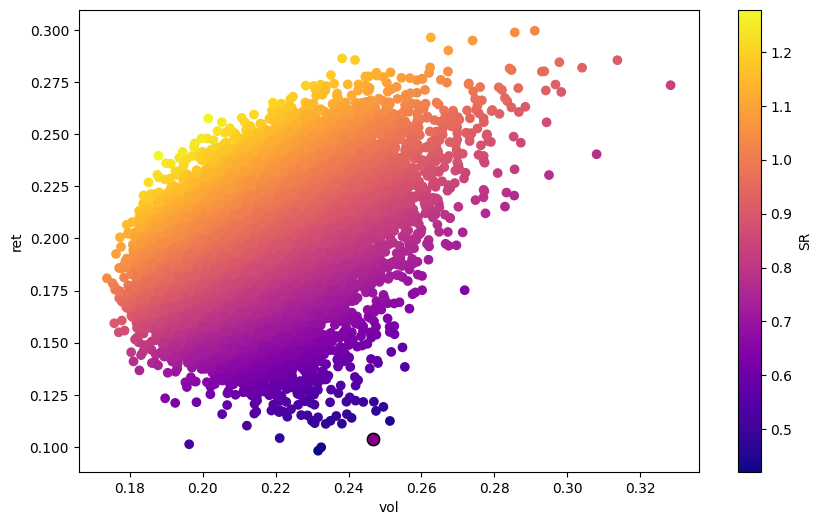

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(vol_arr,ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='SR')
plt.xlabel('vol')
plt.ylabel('ret')
plt.scatter(min_vol_port,min_ret_port, c='purple', s=80, edgecolors='black')

## OPTIMIZACIÓN DE PORTAFOLIO CON SCIPY ##

In [ ]:
def get_ret_vol_sr(weights):
  weights = np.array(weights)
  ret = np.sum(log_returns.mean()*weights)*252
  vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252,weights)))
  sr = ret/vol
  return np.array([ret,vol,sr])

In [ ]:
from scipy.optimize import minimize

def neg_sharpe(weights):
  return get_ret_vol_sr(weights)[2]*-1

def check_sum(weights):
  return np.sum(weights)-1



In [ ]:
cons = ({'type':'eq','fun':check_sum})
bound = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
init_guess =[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bound, constraints=cons)
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.3297757465381086
       x: [ 1.701e-16  1.362e-16  0.000e+00  1.954e-01  0.000e+00
            2.625e-01  1.083e-01  4.338e-01]
     nit: 7
     jac: [ 3.391e-01  9.102e-01  6.668e-01  5.742e-04  7.031e-02
           -1.169e-04 -4.515e-04 -7.522e-05]
    nfev: 64
    njev: 7

In [ ]:
get_ret_vol_sr(opt_results['x'])

array([0.25095109, 0.18871685, 1.32977575])

In [ ]:
pip install quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.9 MB/s eta 0:00:00


In [ ]:
import quantstats as qs

returns = market.pct_change().dropna()
portafolio_returns = pd.Series(
    np.dot(opt_results['x'], returns.T),
    index=returns.index
)
portafolio_returns.index= pd.to_datetime(portafolio_returns.index).tz_localize(None)
qs.reports.metrics(portafolio_returns,
                  benchmark="SPY",
                  mode="full")


                           Benchmark (SPY)    Strategy
-------------------------  -----------------  ----------
Start Period               2010-06-30         2010-06-30
End Period                 2021-08-11         2021-08-11
Risk-Free Rate             0.0%               0.0%
Time in Market             100.0%             100.0%

Cumulative Return          433.68%            2,144.08%
CAGR﹪                     10.95%             21.3%

Sharpe                     0.98               1.59
Prob. Sharpe Ratio         99.93%             100.0%
Smart Sharpe               0.89               1.45
Sortino                    1.37               2.31
Smart Sortino              1.25               2.11
Sortino/√2                 0.97               1.63
Smart Sortino/√2           0.88               1.49
Omega                      1.33               1.33

Max Drawdown               -33.72%            -26.6%
Longest DD Days            277                279
Volatility (ann.)          16.89%             1

QUIZ - INFORME EXPLICATIVO DE LAS VARIABLES

## RIESGO - RENDIMIENTO
*   Sharpe                     (0.98)              (1.59)  : La estrategia tiene un 1.59 frente al 0.98 del benchmark, lo que indica que ofrece una rentabilidad ajustada por riesgo significativamente mejor.Este indicador mide la rentabilidad ajustada por riesgo. Un valor más alto indica un mejor rendimiento en relación con la volatilidad asumida. se CONCLUYE QUE: la estartegia presenta un mejor Sharpe Ratio que el benchmark, lo que indica una mayor eficiencia en la relación riesgo-recompensa.

*   Prob. Sharpe Ratio         (99.93%)             (100.0%) :  La probabilidad de que la estrategia tenga un Sharpe Ratio positivo es del 100%, frente al 99.93% del benchmark, lo que sugiere una mayor confianza en la rentabilidad ajustada por riesgo.

*   Smart Sharpe               (0.89)               (1.45) :Un ajuste del Sharpe que toma en cuenta sesgos de distribución. La estrategia tiene un valor superior, indicando una mejor eficiencia en la relación riesgo-retorno.

*   Sortino                    (1.37)               (2.31) : Similar al Sharpe Ratio, pero solo mide la volatilidad negativa. La estrategia penaliza menos las caídas y tiene un mejor desempeño en relación con el riesgo bajista.

*   Smart Sortino              (1.25)               (2.11) : Un refinamiento del Sortino Ratio. La estrategia demuestra un manejo del riesgo aún más eficiente en comparación con el benchmark.

*   Sortino/√2                 (0.97)               (1.63) :Otra variación del Sortino que ajusta por distribución de retornos. La estrategia muestra un perfil de riesgo-retorno mucho más atractivo.

*   Smart Sortino/√2           (0.88)               (1.49) :Ajuste adicional del Sortino. La estrategia nuevamente presenta una mejor relación entre rendimiento y pérdidas potenciales.

*   Omega                      (1.33)               (1.33) :Ambos valores son idénticos, lo que indica que la relación entre retornos positivos y negativos es similar para la estrategia y el benchmark. Este ratio mide la relación entre las ganancias y las pérdidas en función de un umbral de rentabilidad determinado.


## RIESGO Y VOLATILIDAD
*   Max Drawdown               (-33.72%)            (-26.61%) : La estrategia tuvo una caída máxima del 26.61%, menor que la del benchmark (-33.72%), lo que indica una mejor protección frente a pérdidas extremas. El Drawdown mide la mayor caída desde un pico hasta un valle en la inversión.

* Longest DD Days            (277)                (279) :La cantidad de días en los que la estrategia estuvo en un drawdown es similar al benchmark, lo que sugiere que el tiempo de recuperación de pérdidas no es una ventaja diferenciadora. Indica la duración más larga en días de una fase de drawdown

* Volatility (ann.)          (16.89%)             (18.8%) : La estrategia es ligeramente más volátil que el benchmark, lo que implica mayores fluctuaciones en los retornos.Mide la variabilidad del rendimiento anualizado.

* R^2                        (0.66)               (0.66) :Ambas tienen la misma correlación con el benchmark, lo que indica que la estrategia sigue en gran medida la dinámica del mercado. Mide la correlación con el mercado de referencia.

* Information Ratio          (0.08)               (0.08) :Mide el exceso de retorno sobre el benchmark ajustado por riesgo. Al ser idénticos, la estrategia no muestra una ventaja diferencial en este aspecto. Mide la rentabilidad en exceso sobre el benchmark en relación con el riesgo asumido.

* Calmar                     (0.32)               (0.8) :La estrategia tiene un Calmar Ratio significativamente mejor, lo que indica que ofrece mayores retornos en relación con su drawdown máximo.Mide la rentabilidad ajustada por el drawdown.

* Skew                       (-0.64)              (-0.49) :La asimetría de los retornos es negativa en ambos casos, pero la estrategia tiene un skew menos negativo, lo que sugiere que las pérdidas extremas son menos severas.ndica la inclinación de la distribución de rendimientos.

* Kurtosis                   (14.37)              (10.15) :La kurtosis del benchmark es mayor, lo que implica una mayor presencia de eventos extremos en comparación con la estrategia.Mide la presencia de eventos extremos en la distribución de retornos.



## RENTABILIDAD ESPERADA - RIESGO
* Expected Daily %           (0.06%)              (0.11%):La estrategia tiene un retorno diario esperado superior al benchmark, lo que sugiere una mayor rentabilidad en el corto plazo.Indica la rentabilidad diaria esperada de cada estrategia.

* Expected Monthly %         (1.25%)              (2.33%):La estrategia duplica el retorno mensual esperado del benchmark, lo que la hace más atractiva para inversiones de mediano plazo.  Similar al indicador diario, este representa la rentabilidad mensual esperada.


* Expected Yearly %          (14.98%)             (29.6%):El rendimiento anual esperado de la estrategia es casi el doble del benchmark, lo que indica una alta eficiencia en la generación de retornos. Proyecta la rentabilidad anual basada en el comportamiento pasado.

* Kelly Criterion            (5.5%)               (11.77%):La estrategia presenta una mejor optimización del capital a invertir según la teoría de Kelly.Este criterio indica el tamaño óptimo de la posición para maximizar el crecimiento del capital.

* Risk of Ruin               (0.0%)               (0.0%):Ambas opciones presentan una probabilidad nula de perder todo el capital.  Indica la probabilidad de pérdida total del capital.

* Daily Value-at-Risk        (-1.68%)             (-1.83%): La estrategia tiene un VaR diario ligeramente más negativo, indicando un mayor riesgo potencial de pérdida en un día. Estima la pérdida máxima esperada en un día con un nivel de confianza dado.  

* Expected Shortfall (cVaR)  (-1.68%)             (-1.83%):El cVaR también es más negativo en la estrategia, lo que indica una mayor pérdida esperada en escenarios extremos. Evalúa el promedio de las pérdidas cuando estas superan el VaR.



## EFICIENCIA Y CONSISTENCIA
*   Max Consecutive Wins       (11)                 (12):La estrategia ha logrado una mayor cantidad de ganancias consecutivas, lo que indica consistencia en el rendimiento. Muestra la racha más larga de días consecutivos con ganancias.

* Max Consecutive Losses     (8)                  (9):Un ligero aumento en el número de pérdidas consecutivas en la estrategia, lo que sugiere que puede tener periodos adversos prolongados.  Representa la peor racha de pérdidas consecutivas.

* Gain/Pain Ratio            (0.21)               (0.33):La estrategia tiene una relación más favorable entre ganancias y pérdidas, lo que indica una mejor gestión del riesgo. Relación entre el rendimiento y la pérdida promedio.

* Gain/Pain (1M)             (1.56)               (2.95):En un periodo mensual, la estrategia ofrece un mejor equilibrio entre ganancias y pérdidas. Similar al anterior, pero calculado mensualmente.


## Ratios de Rentabilidad y Riesgo
* Payoff Ratio               (0.87)               (0.95): La estrategia tiene una mejor relación entre ganancia media y pérdida media. Relación entre el tamaño de las ganancias y las pérdidas promedio. Un valor más alto sugiere una mejor administración del riesgo.

* Profit Factor              (1.21)              (1.33): La estrategia tiene una mejor relación entre ganancias y pérdidas totales. Razón entre las ganancias y las pérdidas totales. Un factor mayor a 1 indica una estrategia rentable.

* Common Sense Ratio         (1.13)               (1.36): La estrategia muestra una eficiencia superior en la relación entre ganancias y drawdowns. Mide la eficiencia del rendimiento en relación con la volatilidad.

* CPC Index                  (0.59)               (0.72):Un índice CPC más alto en la estrategia indica una mayor consistencia en el rendimiento. Representa la consistencia del desempeño de la estrategia. Una cifra más alta indica una estrategia más confiable.

* Tail Ratio                 (0.94)              (1.02):La estrategia presenta una mejor asimetría en las ganancias extremas frente a las pérdidas. Mide la asimetría de la distribución de retornos, indicando la probabilidad de eventos extremos. Un ratio mayor sugiere un menor impacto de eventos negativos.

* Outlier Win Ratio          (4.2)              (3.38): La estrategia tiene un menor porcentaje de ganancias excepcionales. Indica la frecuencia de rendimientos atípicamente altos.

* Outlier Loss Ratio         (4.42)               (3.78):La estrategia también tiene un menor porcentaje de pérdidas excepcionales, lo que sugiere una distribución más estable de los rendimientos. Similar al anterior, pero enfocado en las pérdidas extremas.


# DESEMPEÑO TEMPORAL
* MTD                        (1.2% )              (2.54%):La estrategia casi duplica el rendimiento mensual del benchmark, lo que indica un buen arranque en el mes.Rendimiento en el mes actual.

* 3M                         (6.53%)             (11.41%):En los últimos tres meses, la estrategia ha superado significativamente al benchmark, lo que sugiere una tendencia positiva en el corto plazo. Rentabilidad trimestral.

* 6M                         (14.51%)             (17.47%):La estrategia sigue mostrando un mejor desempeño a medio plazo, aunque la diferencia con el benchmark es menor que en el trimestre.  Rentabilidad semestral.

* YTD                        (19.47%)            (18.68%):En lo que va del año, el benchmark ha tenido un rendimiento ligeramente superior, lo que puede indicar una mayor estabilidad en comparación con la estrategia. Rentabilidad acumulada en el año.

* 1Y                         (34.22%)             (44.43%):La estrategia ha generado un 30% más de rendimiento anual que el benchmark, lo que refuerza su fortaleza en periodos de un año. Rentabilidad anual.

* 3Y (ann.)                  (12.19%)             (26.23%):La estrategia más que duplica el rendimiento del benchmark en un plazo de 3 años, mostrando un desempeño más sólido y consistente. Rentabilidad media en 3 años.

* 5Y (ann.)                  (12.29%)             (24.93%):  La estrategia también supera ampliamente al benchmark en el mediano plazo, indicando una gestión eficiente y rentable. Rentabilidad media en 5 años.

* 10Y (ann.)                 (11.44%)             (22.02%): En el largo plazo, la estrategia mantiene su ventaja, lo que indica que es sostenible y competitiva frente al benchmark.  Rentabilidad media en 10 años.
* All-time (ann.)            (10.95%)             (21.3%):La estrategia ha generado el doble de rentabilidad histórica en comparación con el benchmark, lo que confirma su efectividad a largo plazo. Rentabilidad promedio desde el inicio.


## MEJOR Y PEOR DESEMPEÑO
* Best Day                   (9.06%)              (8.82%):Aunque la estrategia ha tenido un mejor desempeño general, su mejor día ha sido ligeramente inferior al del benchmark. Esto sugiere que la estrategia puede ser más estable y menos volátil. Mejor rendimiento diario.

* Worst Day                  (-10.94%)            (-12.46%): La estrategia ha tenido una mayor caída en un solo día en comparación con el benchmark, lo que indica un riesgo de volatilidad superior en eventos extremos.Peor rendimiento diario.

* Best Month                 (12.7%)              (16.03%): La estrategia ha logrado un mes con un rendimiento 3.3% superior, lo que demuestra su potencial en periodos positivos. Mejor rendimiento mensual.

* Worst Month                (-12.49%)            (-9.11%): La peor caída mensual en la estrategia es menor que en el benchmark, lo que indica que la estrategia tiene una mejor capacidad de resistencia en periodos difíciles. Peor rendimiento mensual.

* Best Year                  (32.31%)             (78.0%): La estrategia ha tenido un año excepcionalmente bueno con un rendimiento más del doble que el benchmark, lo que demuestra su capacidad para generar grandes retornos. Mejor rendimiento anual.

* Worst Year                 (-4.57%)             (3.52%):Mientras que el benchmark tuvo un año negativo, la estrategia logró mantenerse en terreno positivo, mostrando una mejor gestión del riesgo. Peor rendimiento anual.


## RIESGO Y RECUPERACIÓN
* Avg. Drawdown              (-1.52% )            (-2.14%):La estrategia experimenta caídas más pronunciadas en promedio, lo que indica mayor volatilidad. Promedio de caídas desde máximos.

* Avg. Drawdown Days         (14     )           (14): Ambas estrategias tardan el mismo tiempo en recuperarse de caídas, lo que sugiere que, a pesar de las caídas más pronunciadas de la estrategia, su capacidad de recuperación es rápida. Promedio de días para recuperación.

* Recovery Factor            (5.44)               (12.44): La estrategia tiene más del doble de capacidad de recuperación en comparación con el benchmark, lo que sugiere una mejor gestión del riesgo y recuperación después de pérdidas. Capacidad de recuperación después de pérdidas.

* Ulcer Index                (0.05 )              (0.05):Ambos tienen el mismo nivel de estrés financiero medido por la profundidad y duración de los drawdowns. Medida del riesgo basada en drawdowns.

* Serenity Index             (4.33  )             (8.82):La estrategia más que duplica la relación entre rentabilidad y drawdowns del benchmark, lo que indica que ofrece un mejor equilibrio entre riesgo y rendimiento. Relación entre rentabilidad y drawdowns.


## RENDIMIENTO EN MESES GANADORES Y PERDEDORES
* Avg. Up Month              (3.5%)               (5.09%): Cuando la estrategia tiene un mes positivo, su rentabilidad es superior a la del benchmark en aproximadamente 1.6 puntos porcentuales, lo que sugiere que en mercados alcistas la estrategia capta mejor las subidas.  Rendimiento promedio en meses positivos.

* Avg. Down Month            (-3.74%)             (-3.08%):La estrategia sufre menores pérdidas en meses negativos en comparación con el benchmark, indicando una mejor capacidad de control del riesgo en mercados bajistas. Rendimiento promedio en meses negativos.

## PORCENTAJE DE GANANCIAS EN DISTINTOS PERIODOS
* Win Days %                 (55.99%)             (57.08%):La estrategia tiene un mayor porcentaje de días positivos, lo que indica un desempeño más estable y con más oportunidades de generar ganancias diarias. Porcentaje de días con rendimiento positivo.

* Win Month %                (71.64%)             (69.4%): Aunque la estrategia tiene un porcentaje de meses positivos ligeramente menor que el benchmark, la rentabilidad en estos meses es mayor (ver Avg. Up Month), lo que significa que cuando la estrategia gana, lo hace con más fuerza. Porcentaje de meses con rendimiento positivo.

* Win Quarter %              (84.44%)             (82.22%):El porcentaje de trimestres positivos es similar en ambas estrategias, con una leve ventaja para el benchmark, pero sigue estando dentro de un rango muy alto de éxito. Porcentaje de trimestres con rendimiento positivo.

* Win Year %                 (91.67%)             (100.0%):La estrategia ha tenido todos sus años en positivo, mientras que el benchmark ha registrado algunos años negativos, lo que indica una mayor consistencia en el largo plazo. Porcentaje de años con rendimiento positivo.


## ANÁLISIS DE RIESGO Y EFICIENCIA
* Beta                       (-)                  (0.9):  Un beta de 0.9 indica que la estrategia es menos volátil que el mercado en general. Si el mercado sube o baja un 10%, la estrategia tiende a moverse solo un 9%. Sensibilidad al mercado.

* Alpha                      (-)                  (0.15): Un alpha positivo indica que la estrategia genera un rendimiento adicional sobre lo que se esperaría dado su nivel de riesgo (medido por el beta). Un alpha de 0.15 sugiere que la estrategia supera al mercado de manera consistente. Rentabilidad ajustada al riesgo.
* Correlation                (-)                  (81.11%):La estrategia tiene una correlación del 81.11% con el mercado, lo que significa que su desempeño está altamente alineado con el mercado general, aunque aún mantiene cierta independencia en su comportamiento. Correlación con el mercado.

* Treynor Ratio              (-)                  (2375.8%):Este indicador mide cuánta rentabilidad adicional obtiene la estrategia por cada unidad de riesgo sistemático asumido. Un Treynor Ratio extremadamente alto sugiere que la estrategia está generando un rendimiento excepcional en relación con el riesgo asumido. Rentabilidad ajustada por riesgo sistemático.




